# PREDICTION OF GRADUATE ADMISSIONS FROM AN INDIAN PERSPECTIVE.
## Table of Contents
* [Introduction](#Chapter_1_Introduction)
    * [Objectives](#Objecives)
* [Data preparation and Exploration][def]
    * [Understanding the Data](#Understanding-the-Data)
    * [Exploratory Data analysis](#Exploratory-Data-Analysis)

* [Hypothesis](#Hypothesis)

# Chapter 1: Introduction =
The purpose of this notebook is to perform data analysis on a dataset containing information about graduate admissions for masters in India.  
The goal is create a model that can accurately predict the chances of admission. <br>
The DataSet for the model is provided by: <br>

**Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019**

## Objectives
- Identifying patterns and trends in the data.
- Build a model to predict admission chances.


[def]: #Data-preparation-and-Exploration

# Chapter 2: Data preparation and Exploration


## 2.1 Understanding the Data
#### Importing the libraries

- The data set is available as a csv file we will use python libraries to understand the historical Data
Libraries aid in reducing coding errors and allow for a better development experience (no need to re-invent the wheel) since we will use ready made functions to perform the analysis.

In [141]:
#importing libraries

import pandas as pd
#data processing and analysis

import numpy as np
#scientific computing

import matplotlib.pyplot as plt
#visualization of data

%matplotlib inline
#to show plots in jupyter notebook

In [142]:
# Importing the dataset
dfAdmissionPredict = pd.read_csv('Admission_Predict_Ver1.1.csv' , sep = ',')
#sep = ',' is used to separate the values in the csv file

dfAdmissionPredict.columns = dfAdmissionPredict.columns.str.strip()
dfAdmissionPredict.columns = dfAdmissionPredict.columns.str.replace(' ', '_')
#replacing the spaces in the column names with underscores so as to prevent errors while calling the column names

dfAdmissionPredict.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial_No.         500 non-null    int64  
 1   GRE_Score          500 non-null    int64  
 2   TOEFL_Score        500 non-null    int64  
 3   University_Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [143]:
dfAdmissionPredict.head(10)

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


- **Chance of Admit** is the target variable the one we wish to predict
- **Chance of Admit** is continous not categorical hence this is a regression problem.
- Excluding **Serial No.** the other columns are predictor varables
- We will train our model using the predictor variables

In [144]:
dfAdmissionPredict.describe()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [145]:
dfAdmissionPredict.dtypes

Serial_No.             int64
GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance_of_Admit      float64
dtype: object

- All data is infered as numerical no categorical or textual data but Research seems to be categorical.
-  We will convert Research to categorical data

In [146]:
#Changing the data type of Research column to object
dfAdmissionPredict['Research'] = dfAdmissionPredict['Research'].astype(object)
dfAdmissionPredict.dtypes

Serial_No.             int64
GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance_of_Admit      float64
dtype: object

In [147]:
dfAdmissionPredict.shape

(500, 9)

- The data set has 400 entries and 9 columns

## 2.2 Exploratory Data Analysis


In [148]:
missing_Percentage = dfAdmissionPredict.isnull().sum() * 100/len(dfAdmissionPredict)
missing_values = pd.DataFrame({'column_name' : dfAdmissionPredict.columns, 'Missing Percentage' : missing_Percentage})
missing_values

,column_name,Missing Percentage
Serial_No.,Serial_No.,0.0
GRE_Score,GRE_Score,0.0
TOEFL_Score,TOEFL_Score,0.0
University_Rating,University_Rating,0.0
SOP,SOP,0.0
LOR,LOR,0.0
CGPA,CGPA,0.0
Research,Research,0.0
Chance_of_Admit,Chance_of_Admit,0.0


- From the above we can deduce that there are no missing values and our dataset is clean

In [149]:
dfAdmissionPredict.duplicated().sum()

0

- There are no duplicates in the data.

### Identify and removing Outliers

We will use data visualization to identify outliers and remove them from the dataset

<AxesSubplot: >

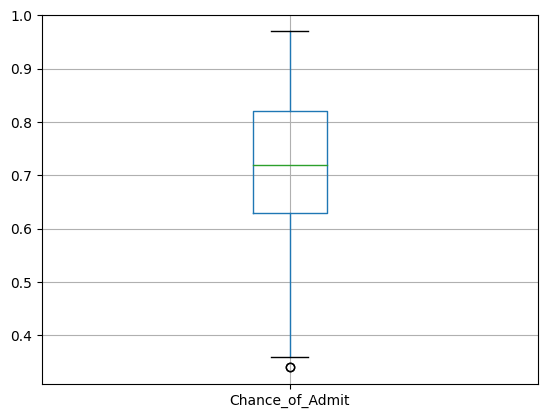

In [150]:
dfAdmissionPredict.boxplot(column = ['Chance_of_Admit'])
#boxplot for the target variable

- The circle shows the presence of outliers in the data column Chance of Admit

<AxesSubplot: >

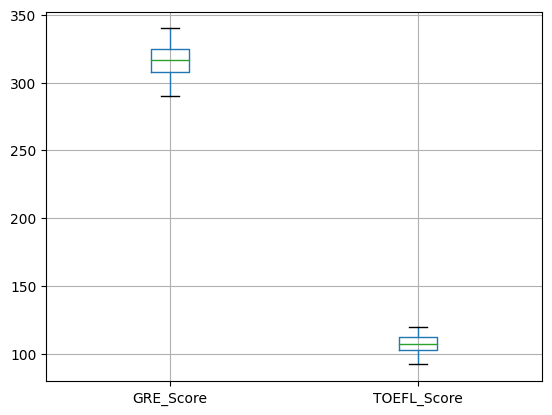

In [151]:
dfAdmissionPredict.boxplot(['GRE_Score' , 'TOEFL_Score'])
#boxplot for GRE_Score and TOEFL_Score

There are no outliers in the data columns GRE Score, TOEFL Score.

<AxesSubplot: >

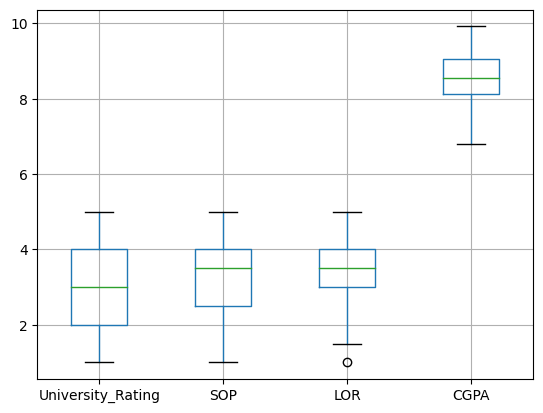

In [152]:
dfAdmissionPredict.boxplot(['University_Rating' , 'SOP' , 'LOR' , 'CGPA'])

- There are outliers in the data columns LOR. 

- To prevent the outliers from affecting the model we will remove the from the dataset.

### Removing Outliers using Interquartile Range (IQR) method
- We do this by removing values that are less than Q1(25<sup>th</sup> percentile) - 1.5 IQR or greater than Q3(75<sup>th</sup>) + 1.5 IQR
- We also need to remove the serial no as it is of no importance to our model

In [153]:
#dropping serial number
df_copy = dfAdmissionPredict.copy()
df_copy.drop(['Serial_No.'] , axis = 1 , inplace = True)
df_copy.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [154]:
#calculating the quartiles for each column
Q1 = df_copy.quantile(0.25)
#Q1 is the first quartile
Q3 = df_copy.quantile(0.75)
#Q3 is the third quartile
IQR = Q3 - Q1
print(IQR)

GRE_Score            17.0000
TOEFL_Score           9.0000
University_Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Chance_of_Admit       0.1900
dtype: float64


C:\Users\Jude Tulel\AppData\Local\Temp\ipykernel_24180\76567028.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_copy.quantile(0.25)
C:\Users\Jude Tulel\AppData\Local\Temp\ipykernel_24180\76567028.py:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_copy.quantile(0.75)


In [155]:
#identifying outliers
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
lower_limit 

GRE_Score            282.50000
TOEFL_Score           89.50000
University_Rating     -1.00000
SOP                    0.25000
LOR                    1.50000
CGPA                   6.75875
Chance_of_Admit        0.34500
dtype: float64

In [156]:
#displaying the outliers
d_out = df_copy[((df_copy < lower_limit) | (df_copy > upper_limit)).any(axis = 1)]
d_out

C:\Users\Jude Tulel\AppData\Local\Temp\ipykernel_24180\722580100.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  d_out = df_copy[((df_copy < lower_limit) | (df_copy > upper_limit)).any(axis = 1)]


,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


- There are 3 outliers in the data frame
- We will remove the outliers from the data frame

In [157]:
#removing the outliers
df_copy = df_copy[~((df_copy < lower_limit) | (df_copy > upper_limit)).any(axis = 1)]
df_copy.shape

C:\Users\Jude Tulel\AppData\Local\Temp\ipykernel_24180\3225477233.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_copy = df_copy[~((df_copy < lower_limit) | (df_copy > upper_limit)).any(axis = 1)]


(497, 8)

In [158]:
dfAdmissionPredict = df_copy.copy()
#copying the dataframe to dfAdmissionPredict
dfAdmissionPredict.shape

(497, 8)

### Univariant Analysis
- We will use histograms to visualize the distribution of the data
- For regression problems we are interested in the distribution of the target variable if it is normally distributed then we can use linear regression to predict the target variable

Text(0.5, 0, 'Chance of Admit')

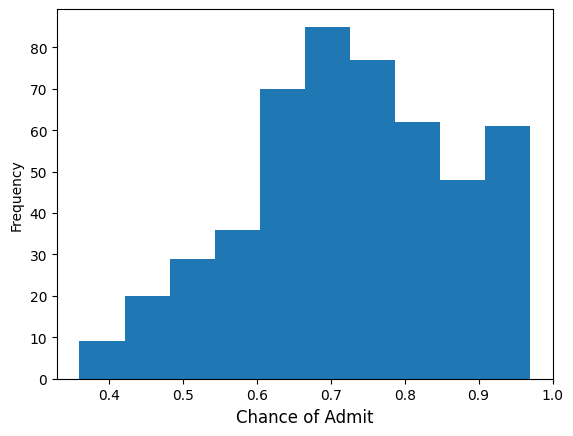

In [159]:
#Chance of Admit histogram
dfAdmissionPredict['Chance_of_Admit'].plot.hist()
plt.xlabel('Chance of Admit', fontsize = 12)

- The target variable is skewed to the right but it shows enough variance to use linear regression

Text(0.5, 0, 'University Rating')

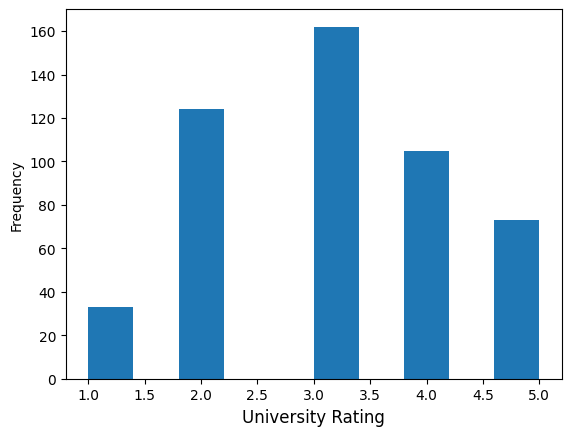

In [160]:
#University Rating histogram
dfAdmissionPredict['University_Rating'].plot.hist()
plt.xlabel('University Rating', fontsize = 12)


- Most of the universities have a rating 3.0 and above the bin 2.5 to 3.0 has no values hence it is not balanced this will affect the model

In [161]:
dfAdmissionPredict['Research'].value_counts()

1    280
0    217
Name: Research, dtype: int64

- 280 of the students have research experience 217 do not have research experience


### Bivariant Analysis

- We will use scatter plots to visualize the relationship between the target variable and the predictor variables 

<AxesSubplot: xlabel='GRE_Score', ylabel='Chance_of_Admit'>

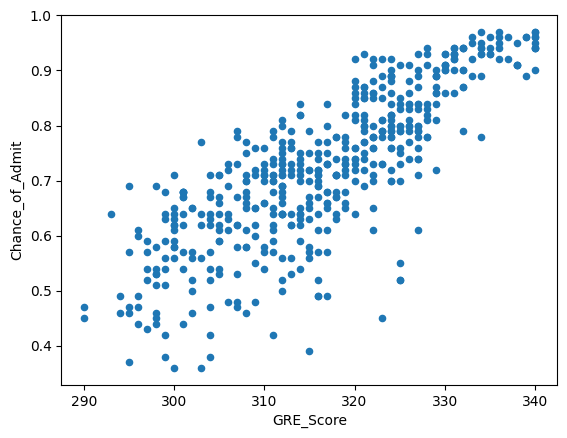

In [162]:
#Relationship between GRE Score and Chance of Admit
dfAdmissionPredict.plot.scatter('GRE_Score' , 'Chance_of_Admit')    

- The scatter plots show a linear relationship between Chance_of_Admit and the GRE Score. 


In [163]:
dfAdmissionPredict['GRE_Score'].corr(dfAdmissionPredict['Chance_of_Admit'])

0.80759358658696

- GRE Score and Chance of Admit have a strong positive  correlation (0.81) this means that as GRE Score increases the Chance of Admit also increases

<AxesSubplot: xlabel='TOEFL_Score', ylabel='Chance_of_Admit'>

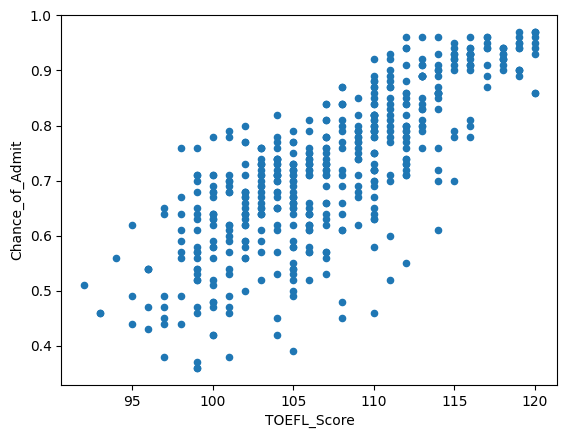

In [164]:
#Relationship between TOEFL Score and Chance of Admit
dfAdmissionPredict.plot.scatter('TOEFL_Score' , 'Chance_of_Admit')

- The scatter plots show a linear relationship between Chance_of_Admit and the TOEFL Score.

In [165]:
#correlation between TOEFL Score and Chance of Admit
dfAdmissionPredict['TOEFL_Score'].corr(dfAdmissionPredict['Chance_of_Admit'])

0.7881282679383224

- TOEFL Score and Chance of Admit have a strong positive  correlation (0.79) this means that as TOEFL Score increases the Chance of Admit also increases.
- GRE Score is more correlated to Chance of Admit than TOEFL Score

<AxesSubplot: xlabel='CGPA', ylabel='Chance_of_Admit'>

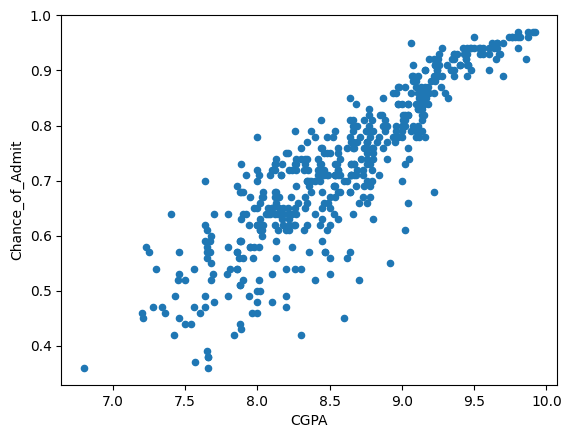

In [166]:
#Relationship between CGPA and Chance of Admit
dfAdmissionPredict.plot.scatter('CGPA' , 'Chance_of_Admit')

- The scatter plots show a linear relationship between Chance_of_Admit and the University Rating.

In [167]:
#correlation between CGPA and Chance of Admit
dfAdmissionPredict['CGPA'].corr(dfAdmissionPredict['Chance_of_Admit'])

0.8831214773197416

- CGPA and Chance of Admit have a strong positive  correlation (0.88) this means that as CGPA increases the Chance of Admit also increases.
- CGPA is more correlated to Chance of Admit than GRE Score and TOEFL Score

<AxesSubplot: xlabel='CGPA', ylabel='GRE_Score'>

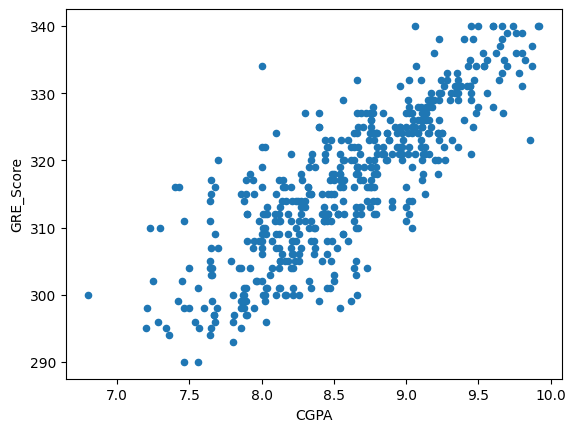

In [168]:
#Relationship between CGPA and GRE Score
dfAdmissionPredict.plot.scatter('CGPA' , 'GRE_Score')

In [169]:
#correlation between CGPA and GRE Score
dfAdmissionPredict['CGPA'].corr(dfAdmissionPredict['GRE_Score'])

0.823738728738834

- The scatter plots show a linear relationship exists between GRE_Score and the CGPA.
- CGPA and GRE Score have a strong positive  correlation (0.83) this means that as CGPA increases the GRE Score also increases.

<AxesSubplot: xlabel='CGPA', ylabel='TOEFL_Score'>

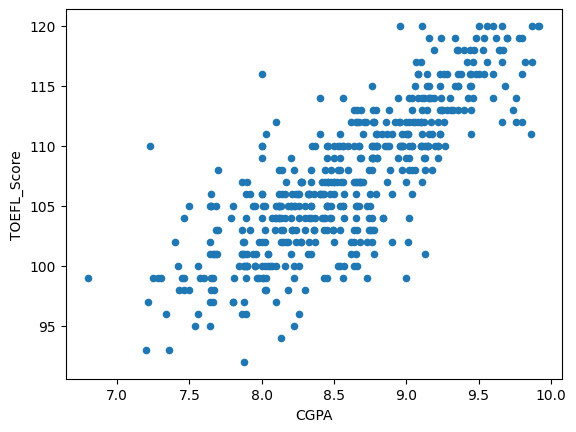

In [170]:
#Relationship between CGPA and TOEFL Score
dfAdmissionPredict.plot.scatter('CGPA' , 'TOEFL_Score')

In [171]:
#correlation between CGPA and TOEFL Score
dfAdmissionPredict['CGPA'].corr(dfAdmissionPredict['TOEFL_Score'])

0.8072817048403571

- The scatter plots show a linear relationship exists between TOEFL_Score and the CGPA.
- CGPA and TOEFL_Score have a strong positive  correlation (0.81) this means that as CGPA increases the TOEFL_Score also increases.

<AxesSubplot: xlabel='University_Rating', ylabel='Chance_of_Admit'>

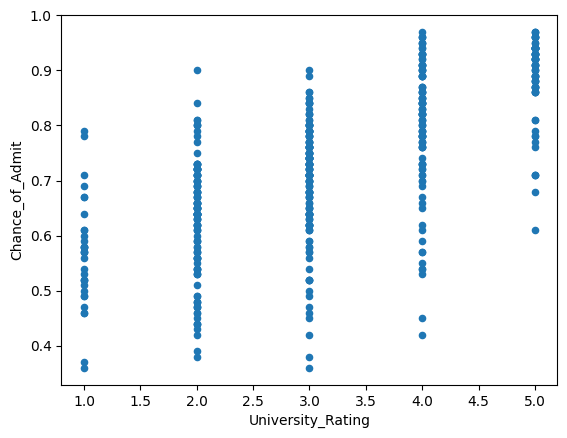

In [172]:
#Relationship between University Rating and Chance of Admit
dfAdmissionPredict.plot.scatter('University_Rating' , 'Chance_of_Admit')

In [173]:
#correlation between University Rating and Chance of Admit
dfAdmissionPredict['University_Rating'].corr(dfAdmissionPredict['Chance_of_Admit'])

0.6886207494419525

- University Rating and Chance of Admit have a modrately strong positive  correlation (0.69) this means that as University Rating increases the Chance of Admit also increases.

#### Importance of EDA

- Exploring the relationship between the predictor variables and target variable aids us feature selection as we will select the features that are highly correlated to the target variable


# Chapter 3: Building the Model
The model will be built using the following steps:
- Splitting the data into training and test sets
- Training the model
- Making predictions
- Evaluating the model




## 3.1 Preprocessing the Data

#### **Segrating the predictor variables from the target variable**

In [174]:
# let X be the independent variables and Y be the dependent variable
X = dfAdmissionPredict.drop(['Chance_of_Admit' ] , axis = 1)
Y = dfAdmissionPredict['Chance_of_Admit']
Y.shape , X.shape

((497,), (497, 7))

- The Independent variables (GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research) are stored in X
- The Dependent variable (Chance of Admit) is stored in Y


In [175]:
#importing the train_test_split function from sklearn
from sklearn.model_selection import train_test_split
#splitting the data into training and testing data
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 12)

- We will use the train_test_split function from sklearn to split the data into training and test sets.
- The train_test_split function takes the following parameters:
    - **X: The predictor variables**
    - **Y: The target variable** 
    - **test_size: The percentage of the data that will be used for testing here we will use 20%**
    - **random_state: A random seed for reproducibility here we will use 12**
- The data will be split into 80% training and 20% test sets


## 3.2 Training the Model
- We will use the Multiple Linear Regression model to train our model

In [176]:
#importing the Multiple Linear Regression model from sklearn
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler as Scaler


In [177]:
#Scaling the data
scaler = Scaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#creating an object of the Linear Regression model
lr = LR()


- lr is the object that will be used to train the model
- We use StandardScaler to normalize the data
- Normalization is the process of scaling the data to a fixed range (0-1) this is done to prevent features with large magnitudes from dominating the model
- Next we will fit the model to the training data

In [178]:
#fitting the model with the training data
lr.fit(X_train , Y_train)

LinearRegression()

- fit is a method that is used to train the model
- The fit method takes the following parameters:
    - **X_train: The predictor variables for training the model**
    - **Y_train: The target variable for training the model**


## 3.3 Making Predictions
- We will use the predict method to make predictions

In [179]:
#predicting the values for the training data and calculating the mean absolute error
Y_pred_train = lr.predict(X_train)
k = mae(Y_pred_train , Y_train)
print('Mean Absolute Error for training data : ' , k)

Mean Absolute Error for training data :  0.04330463681782254


- predict is a method that is used to make predictions
- X_train is the predictor variables for training the model
- Y_pred_train is the predicted values from the training set
- mae is the mean absolute error
- The mean absolute error is the average of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were.
- The mean absolute error is 0.04 this means that the model is accurate

In [180]:
#predicting the values for the testing data and calculating the mean absolute error
Y_pred_test = lr.predict(X_test)
k = mae(Y_pred_test , Y_test)
print('Mean Absolute Error for testing data : ' , k)


Mean Absolute Error for testing data :  0.04052187635159177


-The model is used to make predictions on the test set
- X_test is the predictor variables for testing the model
- Y_pred_test is the predicted values from the test set
- mae is the mean absolute error
- The mean absolute error is 0.04 this means that the model is accurate

## 3.4 Evaluating the Model
- We will use mean squared error to evaluate the model as it is less sesitive

In [181]:
#importing mean squared error
from sklearn.metrics import mean_squared_error as mse


In [183]:
train_score = mse(Y_pred_train , Y_train)
test_score = mse(Y_pred_test , Y_test)

In [184]:
print('Mean Squared Error for training data : ' , train_score)
print('Mean Squared Error for testing data : ' , test_score)

Mean Squared Error for training data :  0.003546187876952954
Mean Squared Error for testing data :  0.003139690278347012


- The mean squared error on training data is 0.0035 this means that the model is accurate
- The mean squared error on test data is 0.0032 this means that the model is accurate